<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [98]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

nlp = spacy.load("en_core_web_lg")

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [198]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

import pandas as pd
df = pd.read_csv('/Users/jasimrashid/Projects/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv')


In [199]:
df[df.title.str.contains('Data Scientist')].head()

,Unnamed: 0,description,title
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
5,5,b'<div>Create various Business Intelligence An...,Data Scientist


In [200]:
df_data_scientist = df[df.title.map(lambda x: x.lower()).str.contains('data scientist')]
len(df_data_scientist.description)
type(df_data_scientist.description)

<class 'pandas.core.series.Series'>

In [201]:
import re

def clean(doc):
    d = {'\\xe2':'','\\x80':'','\\x99':'','\\xe2':'','\\x80':'','\\x99':'','\\xa6':'','\\n':''}
#     print(len(doc))
    soup = BeautifulSoup(doc, 'html.parser')
    text = ''
    for j in soup.find_all('div'):
        text += j.get_text()
        for i, j in d.items():
            text = text.replace(i, j)
#     text = re.sub('[^a-zA-Z 0-9]', '', text)
    return text
        
# for testing: 
# apply on 2 rows: df_data_scientist['description'] = df_data_scientist['description'][:2].apply(clean)

df_data_scientist['description'] = df_data_scientist['description'].apply(clean)

/Users/jasimrashid/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 2) Use Spacy to tokenize the listings 

In [188]:
STOP_WORDS = nlp.Defaults.stop_words.union(['1','2',' ',"i've",'it.',"i'm","it's","\\n",'\\xc2','\\xa8ve','\\na','\\napply','\\xe2' ])

In [191]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [203]:
df_data_scientist['desc_tokens'] = df_data_scientist['description'].apply(get_lemmas)

/Users/jasimrashid/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      [job, requirement, conceptual, understanding, ...
1      [job, DescriptionAs, Data, scientist, 1, help,...
2      [Data, scientist, work, consult, business, res...
3      [$, 4,969, $, 6,756, monthContract$4,969, $, 6...
4                                                     []
                             ...                        
420    [Uber, ignite, opportunity, set, world, motion...
422    [InternshipInternshipAt, Uber, ignite, opportu...
423    [$, 200,000, $, 350,000, year$200,000, $, 350,...
424    [senior, data, SCIENTISTJOB, DESCRIPTIONABOUT,...
425    [Cerner, Intelligence, new, innovative, organi...
Name: desc_tokens, Length: 406, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [208]:
df_data_scientist['desc_tokens'][0].lower()

AttributeError: 'list' object has no attribute 'lower'

In [210]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=nlp.Defaults.stop_words, max_features=1000, )
# max_features > limits of vocab size
# max_df min_df : max and min frequency
# ngram range: "phrases"

#Learn our Vocab
# TODO later: pass own tokenizer
# vect.fit(df_data_scientist['desc_tokens'])
vect.fit(df_data_scientist['description'])

# Get sparse dtm
dtm = vect.transform(df_data_scientist['description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

/Users/jasimrashid/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [212]:
dtm

,000,10,100,12,40,600,abilities,ability,able,academic,...,x98,x9d,xae,xbb,xc2,xef,year,years,youll,youre
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
402,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
404,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,2,0,0


## 4) Visualize the most common word counts

In [218]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from collections import Counter
import squarify
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')


In [223]:
wc = count(df_data_scientist['desc_tokens'])

wc_top20 = wc[wc['rank'] <= 20]
wc_top40 = wc[wc['rank'] <= 40]

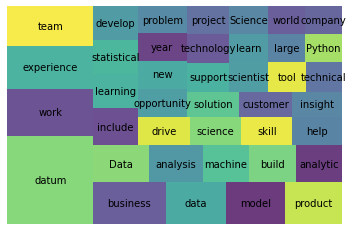

In [224]:
squarify.plot(sizes=wc_top40['pct_total'], label=wc_top40['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [225]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object

# Scenario A - No paramter tuning + Scikit learn's tokenizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# # Scenario B - paramter tuning + Custom tokenizer
# tfidf = TfidfVectorizer(stop_words='english', 
#                         ngram_range=(1,2),
#                         max_df=.97,
#                         min_df=2,
#                         max_features = 8000,
#                         tokenizer=tokenize)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df_data_scientist['description'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,03,04,06366,10,100,1000,1001,105,1079302who,...,yrs,yrsposition,zenreach,zero,zeus,zf,zfs,zillow,zonesability,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [234]:
dtm.shape

(406, 5000)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [227]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
                
                
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [229]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0., 1., 1., 1., 1.]]), array([[  0,  12, 227,   4,   7]]))

In [238]:
nn.kneighbors([dtm.iloc[2].values])

(array([[0., 1., 1., 1., 1.]]), array([[  2, 227,   4,  12,   7]]))

In [239]:
df_data_scientist['description'][2]

'As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets and identify meaningful patterns that lead to actionable recommendations. You will be performing thorough testing and validation of models, and support various aspects of the business with data analytics.Ability to do statistical modeling, build predictive models and leverage machine learning algorithms.This position will combine the typical Data Scientist math and analytical skills, with research, advanced business, communication, and presentation skills.Primary job location is in Sacramento, but work-from-home option is available.QualificationsBachelors, MS or PhD in a relevant field (Computer Science, Engineering, Statistics, Physics, Applied Math)Experience in R and/or Python is preferred'

In [241]:
df_data_scientist['description'][227]

'Agency and Job OverviewWe are OMD, an award-winning, integrated, communications agency. Fueled by data and driven by creativity, OMD provides its clients innovative, actionable media & communication strategies to accelerate their business.As a Senior member of OMDs Marketing Sciences team, you will be responsible for delivering on this vision and shaping the strategic direction of our clients. The ideal candidate is someone who can explore, analyze and visualize dynamic datasets, while having technical expertise in building statistical models (supervised and unsupervised). The Supervisor will work closely with the Marketing Sciences Director to manage resources, implement process improvements and mentor junior members of the team.Areas of Responsibility:Exploration and experimentation with large number of datasets to draw insights and search for storiesPredictive and descriptive analysis based on OMD and OMG dataMaintain data pipelines and visualization outputsUnderstand and participa

In [246]:
ideal_data_science_job_jasim = [""" 
Lead our science investments to solve key measurement challenges involving offline evaluation data - from increasing the sensitivity of measurement within a budget-constrained system to defining the approach we take to create a meaningful measurement of the value a new product innovation will provide to Pinners or advertisers
Collaborate with engineering leaders and product partners to build and evolve the tools that enable us to capture and interpret offline evaluation data
Act as a thought leader in the offline experimentation space - build a roster of high-impact analytical opportunities and partner with engineering leads and product managers to define the future direction and strategy for increasing the value offline experimentation provides to the company
Mentor data scientists and analysts by providing continuous and candid feedback, recognizing individual strengths and contributions and flagging opportunities to improve performance
What were looking for:
Advanced degree in a quantitative field with 6+ years of industry experience and a proven track record of applying statistical methods to solve real-world problems using big data
Experience working with experimentation, measurement or human evaluation platforms and a past experience related to the evolution of these platforms
Demonstrated execution and impact on initiatives that cross multiple product areas and interface with leadership and product teams
Demonstrated expertise in leading, influencing, and (preferably) managing others
Passion for management and influencing the career of others
Self-propelled continuous learner who keeps up with new tools and methodologies and builds prototypes with concepts learned
"""]

In [247]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(ideal_data_science_job_jasim)

In [248]:
nn.kneighbors(new.todense())

(array([[1., 1., 1., 1., 1.]]), array([[127, 137, 126, 129, 132]]))

In [249]:
df_data_scientist['description'][127]

'nullAssociate Data Scientist \\x93 Ten-X CommercialTen-X Commercial is the CRE marketplace that is a force multiplier for sellers, buyers and brokers. Ten-X precision-matches assets, accelerates close rates, and streamlines the entire transaction process with more than $55 billion in sales and increasing daily. Leveraging desktop and mobile technology, Ten-X allows people to safely and easily complete real estate transactions entirely online. We bring quality assets to the market and attract prospective investors from around the world. By virtue of our best-in-class marketing and scalable technology platform, buyers and seller are able to conduct transactions in an efficient manner.Ten-X empowers consumers, investors and real estate professionals with unprecedented levels of flexibility, control and simplicity \\x93 and the convenience of transacting properties whenever and wherever they want. As real estate continues to move online, Ten-X is uniquely positioned at the forefront of th

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 